**QUESTION**:

The following gases carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O) and Ozone (O3) in the atmosphere are implicated in increasing global temperatures, and are known as greenhouse gases. The concentration of these gases in the atmosphere and corresponding global average temperatures obtained from the EPA website (https://www.epa.gov/climate-indicators/weather-climate) between the years 1984 to 2014 is given in the Excel file ghg-concentrations_1984-2014.xlsx (units for different variables are also given in Excel sheet).


(a) Develop a multilinear regression model between global temperature (deviations) and concentrations of greenhouse gases using OLS. Is the global temperature positively correlated with increase in the concentration of these gases?
(b) Estimate the error variance in temperature measurements and confidence intervals (CIs) for all regression coefficients. Based on residual analysis, remove samples suspected of being outliers (one at a time) until there are no outliers.


(c) Improve the regression model obtained in step (b) by dropping unimportant (insignificant) variables (one at a time).


(d) The effect of different gases on the global temperature is expressed in terms of CO2 equivalents or global warming potential (GWP). Is it possible to make any inference regarding GWP of the gases from the regression coefficients? Compare the GWP obtained from regression coefficients to the values obtained over a 20 year time horizon: CO2 (1), CH4 (86), N2O (289).


Notes: Water vapour, which is present in significant amount is the atmosphere is also a greenhouse gas, but it remains almost constant and is relatively unaffected by human activity. CFCs/HCFCs which are also greenhouse gases are however being monitored only in recent years.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ghg-concentrations-1984-2014/ghg-concentrations_1984-2014.xlsx


In [2]:
# Reading the file "ghg-concentrations-1984-2014"
concentrations=pd.read_excel("/kaggle/input/ghg-concentrations-1984-2014/ghg-concentrations_1984-2014.xlsx")

In [3]:
# print the first five rows of the dataframe using the belolw function
concentrations.head()

,Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Web update: April 2016,NaN,NaN,NaN,NaN,NaN,NaN
1,Temp is deviation from 1901-2000 average,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,CO2 (ppm),CH4 (ppb),N2O (ppb)O3 (,O3 (Dobson unit),NaN,Temp (deg F)
4,1984.0,344.58,1655.843333,304.149167,282.07525,NaN,0.27


In [4]:
# print the information about the dataset using the below function
concentrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators  34 non-null     object 
 1   Unnamed: 1                                                                                    32 non-null     object 
 2   Unnamed: 2                                                                                    32 non-null     object 
 3   Unnamed: 3                                                                                    32 non-null     object 
 4   Unnamed: 4                                                                                    32 non-null     object 
 5   Unnamed: 5                      

In [5]:
# Dropping the unnecessary rows.
concentrations.drop(index=concentrations.index[:4],axis=0,inplace=True)
concentrations.head()

,Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
4,1984.0,344.58,1655.843333,304.149167,282.07525,NaN,0.27
5,1985.0,346.04,1668.064167,304.270833,278.234482,NaN,0.234
6,1986.0,347.39,1681.835,304.555833,279.845398,NaN,0.414
7,1987.0,349.16,1693.105,305.145455,279.76918,NaN,0.666
8,1988.0,351.56,1703.948333,306.035833,279.117045,NaN,0.666


In [6]:
# Renaming the column names
concentrations.set_axis(["year","co2","CH4","N2O","O3","x","temp"],axis="columns",inplace=True)

In [7]:
# printing the updated dataframe
print(concentrations)

      year     co2          CH4         N2O          O3   x   temp
4   1984.0  344.58  1655.843333  304.149167   282.07525 NaN   0.27
5   1985.0  346.04  1668.064167  304.270833  278.234482 NaN  0.234
6   1986.0  347.39     1681.835  304.555833  279.845398 NaN  0.414
7   1987.0  349.16     1693.105  305.145455   279.76918 NaN  0.666
8   1988.0  351.56  1703.948333  306.035833  279.117045 NaN  0.666
9   1989.0  353.07  1717.980833  307.043333  283.993979 NaN  0.522
10  1990.0  354.35  1731.451667  308.169167  280.411319 NaN  0.774
11  1991.0  355.57  1740.968333  308.908333  282.554298 NaN   0.72
12  1992.0  356.38    1745.4875    309.7375  275.761171 NaN   0.45
13  1993.0  357.07  1748.661667  309.907917  271.723276 NaN  0.504
14  1994.0  358.82     1758.345   310.30975  276.660096 NaN  0.612
15  1995.0   360.8  1761.936667  310.932167  275.933651 NaN   0.81
16  1996.0  362.59  1763.126667   311.70325  278.545608 NaN  0.576
17  1997.0  363.71  1772.479167   312.64275  275.044719 NaN  0

In [8]:
# Dropping the unwanted columns and updating the dataframe
conc=pd.DataFrame({"co2":concentrations["co2"],"ch4":concentrations["CH4"],"n2o":concentrations["N2O"],"o3":concentrations["O3"],"temp":concentrations["temp"]})
conc=conc.dropna(axis=0)
print(conc)

       co2          ch4         n2o          o3   temp
4   344.58  1655.843333  304.149167   282.07525   0.27
5   346.04  1668.064167  304.270833  278.234482  0.234
6   347.39     1681.835  304.555833  279.845398  0.414
7   349.16     1693.105  305.145455   279.76918  0.666
8   351.56  1703.948333  306.035833  279.117045  0.666
9   353.07  1717.980833  307.043333  283.993979  0.522
10  354.35  1731.451667  308.169167  280.411319  0.774
11  355.57  1740.968333  308.908333  282.554298   0.72
12  356.38    1745.4875    309.7375  275.761171   0.45
13  357.07  1748.661667  309.907917  271.723276  0.504
14  358.82     1758.345   310.30975  276.660096  0.612
15   360.8  1761.936667  310.932167  275.933651   0.81
16  362.59  1763.126667   311.70325  278.545608  0.576
17  363.71  1772.479167   312.64275  275.044719  0.918
18  366.65    1777.8025  313.342833  278.348428  1.134
19  368.33  1784.723333  314.249417  278.995987  0.792
20  369.52  1784.401667  315.031667  279.705348  0.756
21  371.13

In [9]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 4 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   co2     31 non-null     object
 1   ch4     31 non-null     object
 2   n2o     31 non-null     object
 3   o3      31 non-null     object
 4   temp    31 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [10]:
# converting the data types to float
conc=conc.astype({"co2":'float',"ch4":'float',"n2o":'float',"o3":'float',"temp":'float'})
print(conc.dtypes)

co2     float64
ch4     float64
n2o     float64
o3      float64
temp    float64
dtype: object


Importing the necessary libraries.

In [11]:
import matplotlib .pyplot as plt
import pandas as pd
import statsmodels .api as sm
from statsmodels .formula.api import ols

In [12]:
# analyzing linear models using Python and the data science module statsmodels
model = ols("temp~co2+ch4+n2o+o3", data=conc)# define the model
model_matrix = pd. DataFrame (model.exog ,columns=model. exog_names )
print( model_matrix )

    Intercept     co2          ch4         n2o          o3
0         1.0  344.58  1655.843333  304.149167  282.075250
1         1.0  346.04  1668.064167  304.270833  278.234482
2         1.0  347.39  1681.835000  304.555833  279.845398
3         1.0  349.16  1693.105000  305.145455  279.769180
4         1.0  351.56  1703.948333  306.035833  279.117045
5         1.0  353.07  1717.980833  307.043333  283.993979
6         1.0  354.35  1731.451667  308.169167  280.411319
7         1.0  355.57  1740.968333  308.908333  282.554298
8         1.0  356.38  1745.487500  309.737500  275.761171
9         1.0  357.07  1748.661667  309.907917  271.723276
10        1.0  358.82  1758.345000  310.309750  276.660096
11        1.0  360.80  1761.936667  310.932167  275.933651
12        1.0  362.59  1763.126667  311.703250  278.545608
13        1.0  363.71  1772.479167  312.642750  275.044719
14        1.0  366.65  1777.802500  313.342833  278.348428
15        1.0  368.33  1784.723333  314.249417  278.9959

array([[<AxesSubplot:xlabel='co2', ylabel='co2'>,
        <AxesSubplot:xlabel='ch4', ylabel='co2'>,
        <AxesSubplot:xlabel='n2o', ylabel='co2'>,
        <AxesSubplot:xlabel='o3', ylabel='co2'>,
        <AxesSubplot:xlabel='temp', ylabel='co2'>],
       [<AxesSubplot:xlabel='co2', ylabel='ch4'>,
        <AxesSubplot:xlabel='ch4', ylabel='ch4'>,
        <AxesSubplot:xlabel='n2o', ylabel='ch4'>,
        <AxesSubplot:xlabel='o3', ylabel='ch4'>,
        <AxesSubplot:xlabel='temp', ylabel='ch4'>],
       [<AxesSubplot:xlabel='co2', ylabel='n2o'>,
        <AxesSubplot:xlabel='ch4', ylabel='n2o'>,
        <AxesSubplot:xlabel='n2o', ylabel='n2o'>,
        <AxesSubplot:xlabel='o3', ylabel='n2o'>,
        <AxesSubplot:xlabel='temp', ylabel='n2o'>],
       [<AxesSubplot:xlabel='co2', ylabel='o3'>,
        <AxesSubplot:xlabel='ch4', ylabel='o3'>,
        <AxesSubplot:xlabel='n2o', ylabel='o3'>,
        <AxesSubplot:xlabel='o3', ylabel='o3'>,
        <AxesSubplot:xlabel='temp', ylabel='o3'>],
 

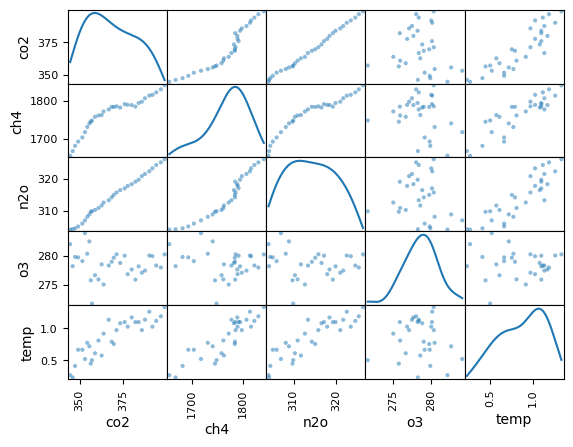

In [13]:
# Plotting the scatter plots to check whether there is any correlation between variables or not
from pandas.plotting import scatter_matrix
scatter_matrix(conc, diagonal="kde")

From the above plots we can see a clear correlaion between co2,n2o and ch4. But dropping all the variables is not appropriate.First lets try by fitting all the variables in the formula.

In [14]:
fit = model.fit () #fit the model defined above
b0 , b1, b2, b3, b4 = fit.params
print(fit.params)

Intercept    11.799826
co2           0.060714
ch4           0.005914
n2o          -0.146524
o3            0.008037
dtype: float64


The above output gives the least-squares estimates of β0, β1 ,β2, β3 and β4.

Although ols performs a complete analysis of the linear model, not all its calculations need to be presented. A summary of the results can be obtained with the method summary.

In [15]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     34.27
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           5.13e-10
Time:                        09:08:19   Log-Likelihood:                 22.234
No. Observations:                  31   AIC:                            -34.47
Df Residuals:                      26   BIC:                            -27.30
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7998     12.060      0.978      0.337     -12.989      36.589
co2            0.0607      0.027      2.239      0.034       0.005       0.116
ch4            0.0059      0.002      2.953      0.007       0.002       0.010
n2o           -0.1465      0.074     -1.972      0.059      -0.299       0.006
o3             0.0080      0.011      0.761      0.454      -0.014       0.030
==============================================================================
Omnibus:                        1.691   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.064
Skew:                           0.060   Prob(JB):                        0.587
Kurtosis:                       2.100   Cond. No.                     9.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The main output items are the following:

•**coef**: Estimates of the parameters of the regression line.

• **std error**: Standard deviations of the estimators of the regression line. These are the square roots of the variances of the {bβi} obtained.

• **t**: Realization of test statistics associated with the hypotheses H0 : βi = 0 and H1 : βi , 0, i = 0, 1. In particular, the outcome of T.

• **P>|t|** : P-value of test (two-sided test).

• **[0.025 0.975]**: 95% confidence intervals for the parameters.

• **R-Squared**: Coefficient of determination R2 (percentage of variation explained by the regression)

• **Adj. R-Squared**: adjusted R2

• **F-statistic**: Realization of the F test statistic associated with testing the full model against the default model. The associated degrees of freedom (Df Model and Df Residuals) are given, as is the P-value: Prob (F-statistic).

• **AIC**: The AIC number is, minus two times the log-likelihood plus two times the number of model parameters.

From the above statistical summary, the p-value of the variables intercept and o3 are greater than 0.05. so, lets drop these variables and compare the R2 value.

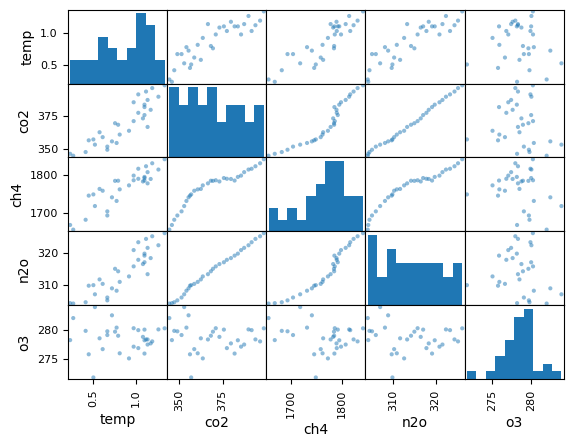

In [16]:
# Plotting the scatter plots to check whether there is any correlation between variables or not
axes = pd. plotting . scatter_matrix (conc [["temp","co2","ch4","n2o","o3"]])
plt.show ()

In [17]:
# correlation matrix showing the amount of correlation between the variables.
print(round(conc.corr(),2))

       co2   ch4   n2o    o3  temp
co2   1.00  0.93  1.00 -0.11  0.89
ch4   0.93  1.00  0.95 -0.21  0.88
n2o   1.00  0.95  1.00 -0.13  0.88
o3   -0.11 -0.21 -0.13  1.00 -0.06
temp  0.89  0.88  0.88 -0.06  1.00


From the above correlation matrix we can say that the global temperature is positively correlated with increase in the concentration of CO2,CH4 and N2O gases and negatively correlated with the O3 gas.

We can perform an analysis of residuals to examine whether the underlying assumptions of the (normal) linear regression model are verified. Various plots of the residuals can be used to inspect whether the assumptions on the errors {εi} are satisfied. The below code gives two such plots. The first is a scatterplot of the residuals {ei} against the fitted values. When the model assumptions are valid, the residuals, as approximations of the model error, should behave approximately as iid normal random variables for each of the fitted values, with a constant variance. In this case we see no strong aberrant structure in this plot. The residuals are fairly evenly spread and symmetrical about the y = 0 line. The second plot is a quantile–quantile (or qq) plot. This is a useful way to check for normality of the error terms, by plotting the sample quantiles of the residuals against the theoretical quantiles
of the standard normal distribution. Under the model assumptions, the points should lie approximately on a straight line. For the current case there does not seem to be an extreme departure from normality. Hence, there are no outliers.

Visualizing the residuals and fitted values

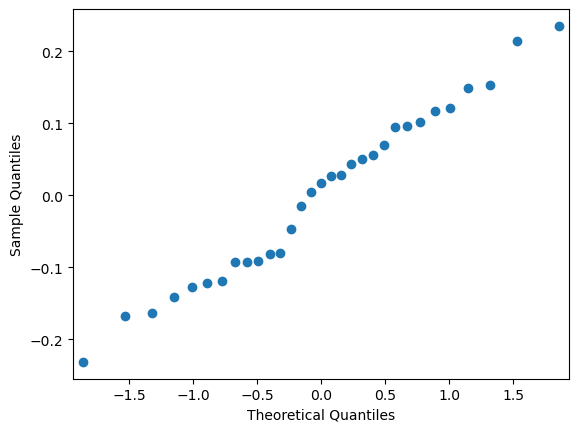

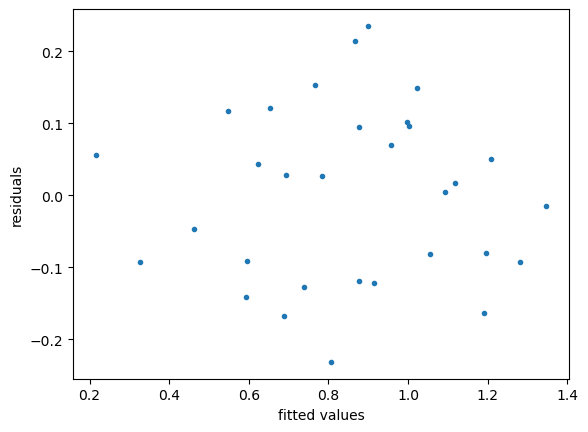

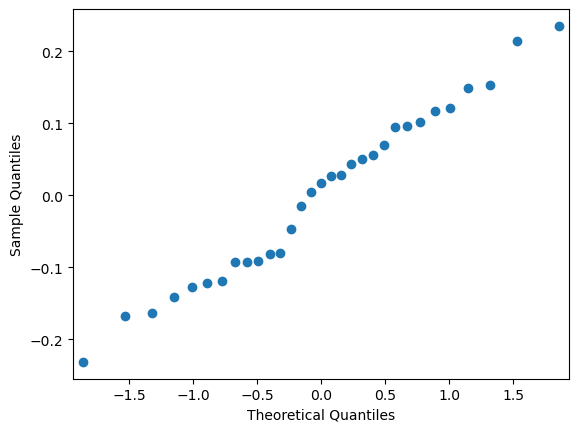

In [18]:
plt.plot(fit.fittedvalues ,fit.resid ,'.')
plt.xlabel("fitted values")
plt.ylabel("residuals")
sm.qqplot(fit.resid)

Dropping the Intercept and O3 variables and rebuilding the model.

In [19]:
model2 = ols("temp~co2+ch4+n2o-1", data=conc) # define the model
fit2 = model2.fit () #fit the model defined above
b00,b11,b22 = fit2.params
print(fit2.params)

co2    0.026647
ch4    0.003878
n2o   -0.050391
dtype: float64


The above output gives the least-squares estimates of β0, β1 and β2.

In [20]:
# printing the summary of the updated model fit
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   temp   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              482.6
Date:                Fri, 24 Mar 2023   Prob (F-statistic):                    3.37e-24
Time:                        09:08:21   Log-Likelihood:                          20.692
No. Observations:                  31   AIC:                                     -35.38
Df Residuals:                      28   BIC:                                     -31.08
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co2            0.0266      0.003      8.715      0.000       0.020       0.033
ch4            0.0039      0.002      2.530      0.017       0.001       0.007
n2o           -0.0504      0.008     -6.295      0.000      -0.067      -0.034
==============================================================================
Omnibus:                        2.429   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.255
Skew:                           0.016   Prob(JB):                        0.534
Kurtosis:                       2.015   Cond. No.                         635.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The standard error variance for the regression coefficients co2, ch4 and n2o are 0.003, 0.002 and 0.008 respectively. The 95% CI for the regression coefficients co2, ch4 and n2o are [0.020,0.033],[0.001,0.007] and [-0.067,-0.034] respectively.

**CONCLUSION 1**:

From the above summary, we can see that the regression coefficient of N2O is negative, but from our previous correlation analysis we found that N2O is positively correlated with temperature. It is because, In the regression analysis, we are estimating the value of temperature rise from the known data including all the concentrations of different gases. So, the regression coefficient tells us the impact of N2O in predicting the temperature rise from all the given gases. Coming to correlation,it is individual analysis. To understand better lets build a model considering only the N2O gas.

In [25]:
model3 = ols("temp~n2o-1", data=conc) # define the model
fit3 = model3.fit () #fit the model defined above
b00 = fit3.params
print(fit3.params)

n2o    0.002724
dtype: float64


In [26]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   temp   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              280.6
Date:                Fri, 24 Mar 2023   Prob (F-statistic):                    8.98e-17
Time:                        09:24:01   Log-Likelihood:                         -4.5303
No. Observations:                  31   AIC:                                      11.06
Df Residuals:                      30   BIC:                                      12.49
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
n2o            0.0027      0.000     16.752      0.000       0.002       0.003
==============================================================================
Omnibus:                        2.670   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                1.917
Skew:                          -0.427   Prob(JB):                        0.383
Kurtosis:                       2.130   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From  the above summary, the regression coefficient of N2O is positive.

So, the global temperature is positively correlated with N2O when considering individually.

**CONCLUSION 2**:

I think it is not possible to make any inference regarding GWP of the gases from the regression coefficients because GWP is a measure of how much energy the emissions of 1 ton of a gas will absorb over a given period of time, relative to the emissions of 1 ton of carbon dioxide (CO2). i.e., we can determine the GWP of individual gases when we know the impact of each gases in terms of CO2. But the regression coefficients tells us the impact of each of the gases in rising the temperature.